In [75]:
import scipy.spatial
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
#based on https://stackoverflow.com/questions/19634993/volume-of-voronoi-cell-python
def volumes(datafile):
    data = np.loadtxt(datafile)
    vor = scipy.spatial.Voronoi(data)
    np.shape(vor.vertices)
    vol = np.zeros(vor.npoints)
    for i, region in enumerate(vor.point_region):
        ids = vor.regions[region]
        if -1 in ids: 
            vol[i] = np.inf
        else:
            vol[i] = scipy.spatial.ConvexHull(vor.vertices[ids]).volume
    return vol

In [5]:
vol_clustered = volumes("../data/sphere_00_stdcosmo_norsd_z0.100.dat")

In [6]:
vol_clustered_percent = volumes("../data/p_010_sphere_00_stdcosmo_norsd_z0.100.dat")

In [7]:
vol_random = volumes("../data/random_sphere_00_stdcosmo_norsd_z0.100.dat")

In [8]:
vol_random_percent = volumes("../data/p_010_random_sphere_00_stdcosmo_norsd_z0.100.dat")

In [231]:
datafile = "../data/sphere_00_stdcosmo_norsd_z0.100.dat"
data = np.loadtxt(datafile)
n_points = 1000
tri = scipy.spatial.Delaunay(data[:n_points,:])

In [232]:
np.shape(tri.simplices), len(data)

((6212, 4), 83216)

In [233]:
pairs = list()
for l in range(len(tri.simplices)):
    simp = tri.simplices[l]
    for i in range(4):
        for j in range(i+1,4):
            p = sorted([simp[i], simp[j]])
            if p not in pairs:
                pairs.append(p)


In [234]:
a = np.array(pairs).flatten()
c = Counter(a)

In [239]:
h = Counter(list(c.values()))

max_connection = 50
probas = np.zeros(max_connection)
for i in range(max_connection):
    if i in h.keys():
        probas[i] = h[i]/n_points
print(h)

Counter({12: 97, 14: 94, 15: 87, 13: 85, 11: 72, 17: 68, 16: 67, 10: 60, 9: 60, 19: 49, 18: 45, 8: 35, 20: 30, 7: 24, 21: 20, 22: 19, 23: 17, 25: 15, 24: 12, 6: 12, 26: 7, 28: 6, 5: 6, 27: 3, 32: 2, 30: 2, 37: 1, 33: 1, 36: 1, 38: 1, 31: 1, 29: 1})


1.0


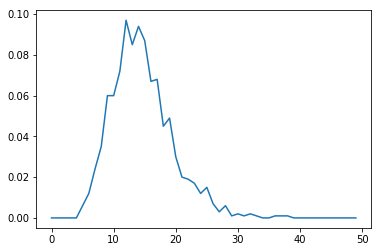

In [240]:
plt.plot(probas)
print(np.sum(probas[probas>0]))

In [241]:
p = probas[probas>0]
print(-np.sum(np.log2(p) *p)) 

4.230960823612927


In [242]:
for l in range(12):
    print(tri.simplices[l])

[563 120 558 161]
[722 563 558 161]
[327 474  10 989]
[356 120 350 161]
[204 120 558 161]
[499 722 558 428]
[499 722 563 558]
[231 515  64 815]
[231 474 506  10]
[231 515 474 506]
[231 356  10 161]
[613 499 722 563]


In [35]:
a = list([simp[0], simp[1]])
print(sorted(a))

[61995, 63171]


In [49]:
vol_clustered = vol_clustered[~np.isinf(vol_clustered)]
vol_random = vol_random[~np.isinf(vol_random)]
vol_clustered_percent = vol_clustered_percent[~np.isinf(vol_clustered_percent)]
vol_random_percent = vol_random_percent[~np.isinf(vol_random_percent)]

vol_clustered = vol_clustered[~np.isinf(vol_clustered)]
vol_random = vol_random[~np.isinf(vol_random)]
vol_clustered_percent = vol_clustered_percent[vol_clustered_percent>0]
vol_random_percent = vol_random_percent[vol_random_percent>0]

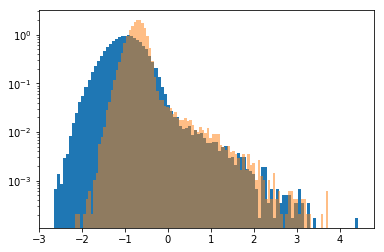

In [52]:
_ = plt.hist(np.log10(vol_clustered/vol_clustered.mean()), bins=100, log=True, density=True)
_ = plt.hist(np.log10(vol_random/vol_random.mean()), bins=100, log=True, density=True, alpha=0.5)

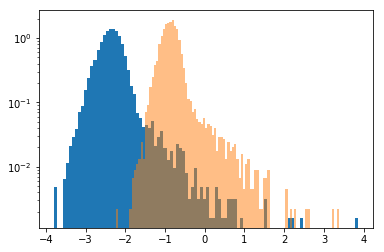

In [54]:
_ = plt.hist(np.log10(vol_clustered_percent/vol_clustered_percent.mean()), bins=100, log=True, density=True)
_ = plt.hist(np.log10(vol_random_percent/vol_random_percent.mean()), bins=100, log=True, density=True, alpha=0.5)

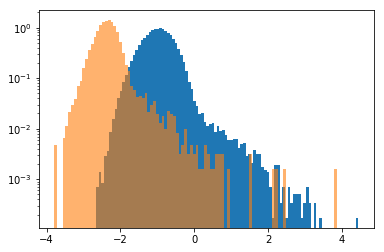

In [62]:
_ = plt.hist(np.log10(vol_clustered/vol_clustered.mean()), bins=100, log=True, density=True)
_ = plt.hist(np.log10(vol_clustered_percent/vol_clustered_percent.mean()), bins=100, log=True, density=True, alpha=0.6)


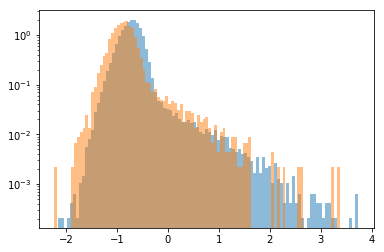

In [61]:
_ = plt.hist(np.log10(vol_random/vol_random.mean()), bins=100, log=True, density=True, alpha=0.5)
_ = plt.hist(np.log10(vol_random_percent/vol_random_percent.mean()), bins=100, log=True, density=True, alpha=0.5)